In [2]:
import pesummary
from pesummary.io import read
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import bilby
from bilby import *

/home/kaushik/miniconda3/envs/igwn-py311/lib/python3.11/site-packages/gwpy/time/__init__.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  from lal import LIGOTimeGPS


In [3]:
# Load and explore the CSV file. Replace the path to the .csv file.
csv_file_path = "/home/kaushik/Documents/PhD_Stuff/IITM-Projects/ENIGMA project/eref_ICTSSims_gwecc.csv"

# Load the CSV file using pandas
df = pd.read_csv(csv_file_path)

print("CSV file loaded successfully!")
print(f"Shape of the data: {df.shape}")
print("\nColumn names:")
print(df.columns.tolist())
print("\nFirst few rows:")
print(df.head())

CSV file loaded successfully!
Shape of the data: (23, 10)

Column names:
['sim_names', 'mchirp', 'chi_eff', 'chi_p', 'mtotal', 'q', 'metadata_ecc', 'gwecc_ecc', 'gwecc_mean_anomaly', 'f_ref']

First few rows:
            sim_names   mchirp  chi_eff   chi_p  mtotal    q  metadata_ecc  \
0  EccContPrecDiff001  13.1857   0.0253  0.3000    36.0  3.0          0.04   
1  EccContPrecDiff003  35.5784  -0.0676  0.2236   102.0  3.5          0.10   
2  EccContPrecDiff004  38.6868   0.3474  0.2952    89.0  1.1          0.15   
3  EccContPrecDiff005  43.9628   0.0046  0.4999   101.0  1.0          0.18   
4  EccContPrecDiff006  49.2702   0.2033  0.4217   116.0  1.5          0.21   

   gwecc_ecc  gwecc_mean_anomaly  f_ref  
0        NaN                 NaN    NaN  
1   0.003956            1.904578   20.0  
2   0.065587            0.847279   22.0  
3   0.060621            3.989970   20.0  
4   0.127570            0.573008   20.0  


In [5]:
# Display the complete DataFrame with all rows and columns. If you're using VS code then click on scrollable element to see the full DataFrame.
print("Complete DataFrame - All rows and columns:")
print("="*80)

# Set pandas options to display all rows and columns
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.width', None, 'display.max_colwidth', None):
    print(df)

print(f"\nDataFrame shape: {df.shape[0]} rows × {df.shape[1]} columns")

Complete DataFrame - All rows and columns:
             sim_names   mchirp  chi_eff   chi_p  mtotal     q  metadata_ecc  \
0   EccContPrecDiff001  13.1857   0.0253  0.3000    36.0   3.0          0.04   
1   EccContPrecDiff003  35.5784  -0.0676  0.2236   102.0   3.5          0.10   
2   EccContPrecDiff004  38.6868   0.3474  0.2952    89.0   1.1          0.15   
3   EccContPrecDiff005  43.9628   0.0046  0.4999   101.0   1.0          0.18   
4   EccContPrecDiff006  49.2702   0.2033  0.4217   116.0   1.5          0.21   
5   EccContPrecDiff007  27.7469   0.0025  0.4123    72.0   2.5          0.08   
6   EccContPrecDiff008  17.4110   0.0013  0.5000    40.0   1.0          0.18   
7       EccPrecDiff002  13.0583   0.1997  0.2005    30.0   1.0          0.10   
8    ICTSEccParallel01  19.7786   0.0005  0.3000    54.0   3.0          0.04   
9    ICTSEccParallel02  20.0394   0.0000  0.4123    52.0   2.5          0.08   
10   ICTSEccParallel03  35.2296   0.0025  0.2236   101.0   3.5          0.10 

In [6]:
# Access specific data - find the current simulation we're working with
# we have total 5 simulations, ["ICTSEccParallel17", "ICTSEccParallel15", "EccPrecDiff002", "EccContPrecDiff008", "EccContPrecDiff007"]
current_sim = "EccPrecDiff002" # Change this to the simulation you want to analyze
current_sim_data = df[df['sim_names'] == current_sim]

print(f"Data for {current_sim}:")
if not current_sim_data.empty:
    print(current_sim_data.to_string(index=False))
    
    # Extract specific values for this simulation
    sim_row = current_sim_data.iloc[0]
    print(f"\nExtracted values for {current_sim}:")
    print(f"  Chirp mass (mchirp): {sim_row['mchirp']}")
    print(f"  Effective spin (chi_eff): {sim_row['chi_eff']}")
    print(f"  Total mass (mtotal): {sim_row['mtotal']}")
    print(f"  Mass ratio (q): {sim_row['q']}")
    print(f"  Metadata eccentricity: {sim_row['metadata_ecc']}")
    print(f"  GWEcc eccentricity: {sim_row['gwecc_ecc']}")
    print(f"  GWEcc mean anomaly: {sim_row['gwecc_mean_anomaly']}")
    print(f"  Reference frequency: {sim_row['f_ref']}")
else:
    print(f"Simulation {current_sim} not found in the CSV file")


Data for EccPrecDiff002:
     sim_names  mchirp  chi_eff  chi_p  mtotal   q  metadata_ecc  gwecc_ecc  gwecc_mean_anomaly  f_ref
EccPrecDiff002 13.0583   0.1997 0.2005    30.0 1.0           0.1   0.315458            2.162427   20.0

Extracted values for EccPrecDiff002:
  Chirp mass (mchirp): 13.0583
  Effective spin (chi_eff): 0.1997
  Total mass (mtotal): 30.0
  Mass ratio (q): 1.0
  Metadata eccentricity: 0.1
  GWEcc eccentricity: 0.3154584957233226
  GWEcc mean anomaly: 2.162427098915757
  Reference frequency: 20.0


In [7]:
# Extract values from CSV for injection lines on corner plot

current_sim_data = df[df['sim_names'] == current_sim]

if not current_sim_data.empty:
    sim_row = current_sim_data.iloc[0]
    
    # Create injection values dictionary for corner plot
    # Map CSV column names to the parameter names used in the corner plot
    csv_injection_values = {
        "chi_eff": sim_row['chi_eff'], 
        "chirp_mass": sim_row['mchirp'],
        "eccentricity": sim_row['gwecc_ecc'],  # Using GWEcc eccentricity
        "mean_anomaly": sim_row['gwecc_mean_anomaly'],  # Using GWEcc mean anomaly
        "mass_ratio": sim_row['q']
    }
    
    print("CSV injection values for corner plot:")
    for param, value in csv_injection_values.items():
        print(f"  {param}: {value}")
else:
    print(f"Simulation {current_sim} not found in CSV file")
    csv_injection_values = None

CSV injection values for corner plot:
  chi_eff: 0.1997
  chirp_mass: 13.0583
  eccentricity: 0.3154584957233226
  mean_anomaly: 2.162427098915757
  mass_ratio: 1.0


In [8]:
# Load the PESummary file for the current simulation
# Replace the path with the actual path to your PESummary file
# Note: Ensure the path is correct and the file exists

f = read(f"/home/kaushik/Documents/PhD_Stuff/IITM-Projects/ENIGMA project/runs_with_ESIGMA/eccentric/ICTS_SIMS/{current_sim}/run01/final_result/ESIGMA-{current_sim}_data0_1137283217-0_analysis_H1L1V1_result.hdf5")
print("loaded file:", f)
samples = f.samples_dict
type(samples)

/home/kaushik/miniconda3/envs/igwn-py311/lib/python3.11/site-packages/pykerr/qnm.py:2: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


lal.MSUN_SI != Msun


2025-07-30  21:53:26 PESummary WARNING : Result file was written with version bilby=2.2.2.1 while your environment has version bilby=2.6.0. This may cause problems when reading the result file.
21:53 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
21:53 bilby WARNING : Prior sampling efficiency is very low, please verify its validity.
2025-07-30  21:53:31 PESummary WARNING : Could not find delta_f in input file and one was not passed from the command line. Using 0.00390625Hz as default
2025-07-30  21:53:31 PESummary WARNING : Could not find f_start in input file and one was not passed from the command line. Using 20.0Hz as default
2025-07-30  21:53:31 PESummary WARNING : The redshift is being approximated using interpolation. Bear in mind th

loaded file: file: /home/kaushik/Documents/PhD_Stuff/IITM-Projects/ENIGMA project/runs_with_ESIGMA/eccentric/ICTS_SIMS/EccPrecDiff002/run01/final_result/ESIGMA-EccPrecDiff002_data0_1137283217-0_analysis_H1L1V1_result.hdf5
cls: pesummary.gw.file.formats.bilby.Bilby
nsamples: 5537
parameters: H1_log_likelihood, H1_matched_filter_snr, ..., V1_matched_filter_abs_snr, V1_matched_filter_snr_angle


pesummary.utils.samples_dict.SamplesDict

Plotting chirp_mass...
13.0583
Plotting eccentricity...
0.3154584957233226
Plotting chi_eff...
0.1997
Plotting mean_anomaly...
2.162427098915757
Plotting mass_ratio...
1.0


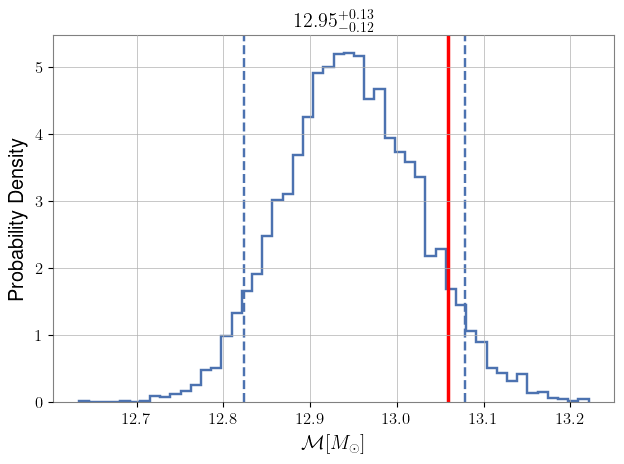

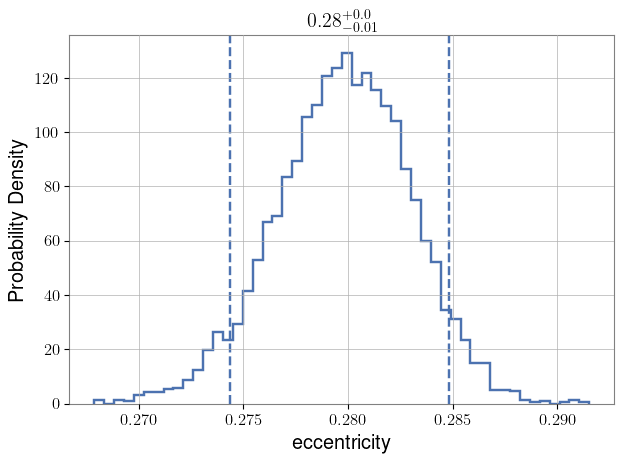

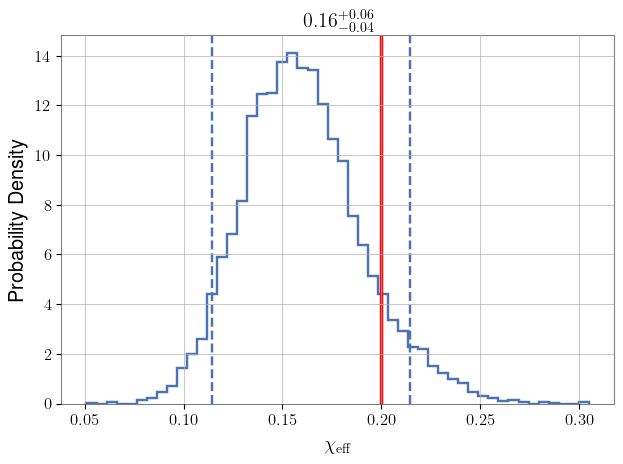

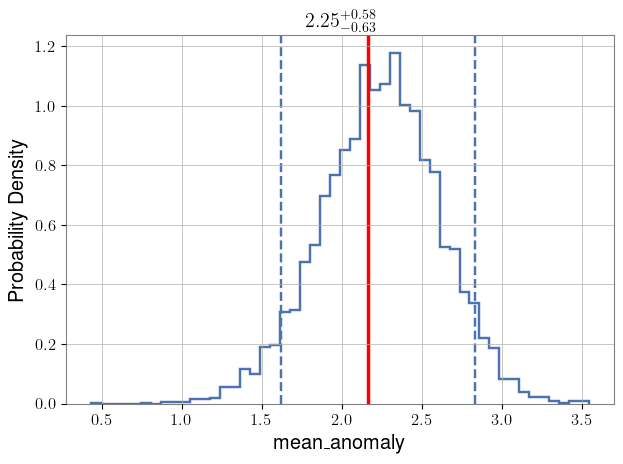

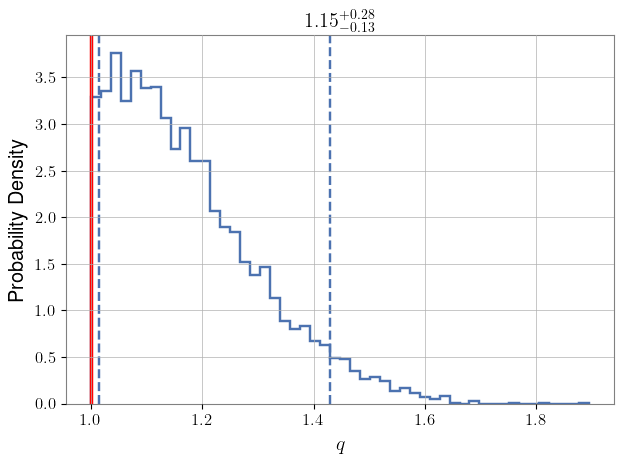

In [ ]:
# plot individual parameters with injection values

param_str = ["chirp_mass", "eccentricity", "chi_eff", "mean_anomaly", "mass_ratio"]

for param in param_str:
    
    # Plot each parameter with injection value
    print(f"Plotting {param}...")
    
    if param == "mass_ratio":
        # For mass_ratio, we need to convert it to the correct form
        samples[param] = 1 / samples[param]
    else:
        samples[param] = samples[param]

    samples.plot(param,type="hist",kde=False, inj_value=csv_injection_values[param], injection_color='red', plot_percentile=True, title=True)
    print(csv_injection_values[param])

    plt.savefig(f"/home/kaushik/Documents/PhD_Stuff/IITM-Projects/ENIGMA project/PE_figs/{current_sim}/{param}_1d_hist.png",bbox_inches='tight',dpi=300)

Creating corner plot with enhanced truth line visibility...
Parameters: ['chi_eff', 'chirp_mass', 'eccentricity', 'mean_anomaly']
Truth values: [0.1997, 13.0583, 0.3154584957233226, 2.162427098915757]


INFO:arviz.preview:arviz_base not installed
INFO:arviz.preview:arviz_stats not installed
INFO:arviz.preview:arviz_plots not installed


✓ Corner plot created!
Truth lines should appear as red lines in:
- Diagonal plots: vertical red lines
- Off-diagonal plots: horizontal and vertical red lines at intersections


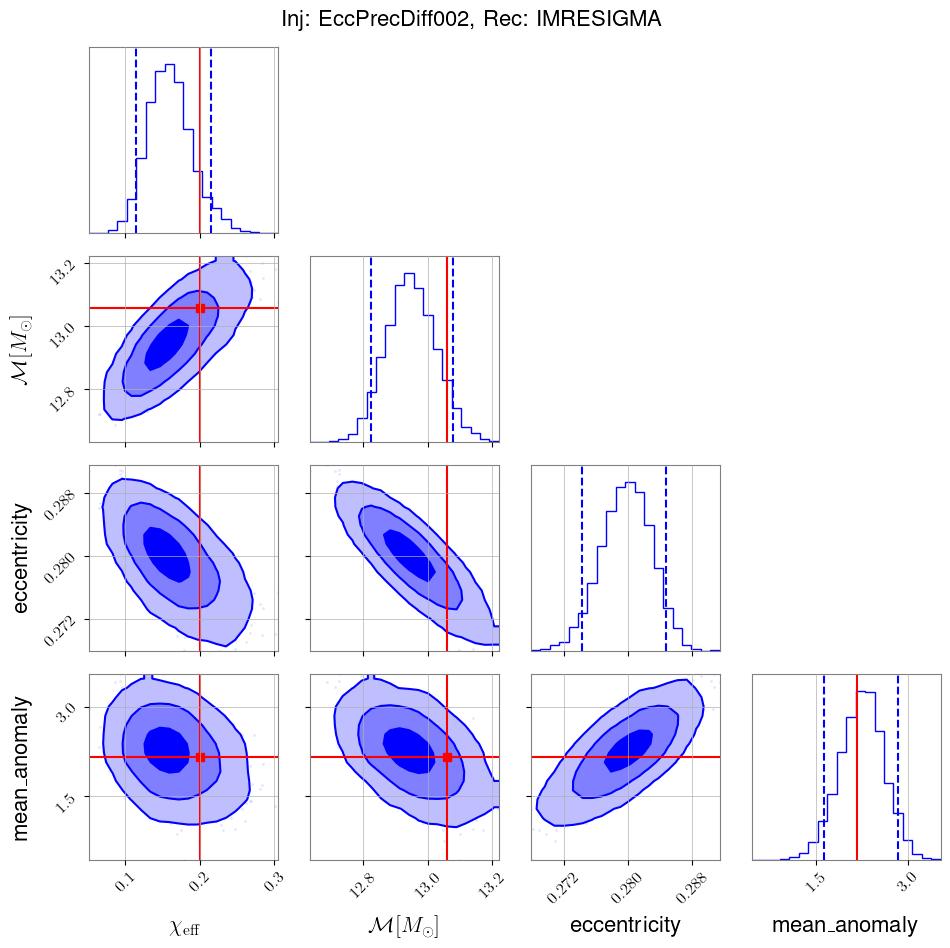

In [ ]:
# CREATE CORNER PLOT WITH VISIBLE TRUTH LINES
parameters = ["chi_eff", "chirp_mass",  "eccentricity", "mean_anomaly"]
injection_subset = {param: csv_injection_values[param] for param in parameters}
truths_list = [injection_subset[param] for param in parameters]
latex_dict = {
    "chi_eff": r"\chi_{\text{eff}}",
    "chirp_mass": r"\mathcal{M}_{\text{chirp}}",
    "eccentricity": r"e",
    "mean_anomaly": r"l",
}

print("Creating corner plot with enhanced truth line visibility...")
print("Parameters:", parameters)
print("Truth values:", truths_list)


fig = samples.plot(
    type="corner", 
    parameters=parameters,
    truths=truths_list,  # LIST of injection values,
    labels=[f"ESIGMA-{current_sim}"],
    truth_color='red',          # Make truth lines red
    color='blue',               # Make contours blue for contrast
    quantiles=[0.05, 0.95],     # this will add 5% and 95% quantiles, this basically corresponds to the 90% credible interval.
    titles=True
)

plt.suptitle(f"Inj: {current_sim}, Rec: IMRESIGMA", fontsize=16, y=0.98)
plt.tight_layout()
plt.savefig(f"PE_figs/{current_sim}/corner_plot_{current_sim}.png", bbox_inches='tight', dpi=300)

print("✓ Corner plot created!")
print("Truth lines should appear as red lines in:")
print("- Diagonal plots: vertical red lines")
print("- Off-diagonal plots: horizontal and vertical red lines at intersections")

In [ ]:
# End of notebook